In [41]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
# --- Load your JSON training log ---
log_path = "results/results_20250505_162412.json"  # ? Change to your actual JSON file path
with open(log_path, "r") as f:
    records = json.load(f)
# Convert to DataFrame and sort by epoch
df = pd.DataFrame(records)
df = df.sort_values("epoch")
df.head(20)

,final_train_loss,final_val_link_loss,final_val_link_auc,final_val_pr_auc,final_val_cox_loss,c_indices_per_condition,pr_auc_per_condition,mean_c_index,epoch,NEGATIVE_MULTIPLIER,timestamp
0,0.709490,1.672520,0.788677,0.571916,6.099409,"[0.7999904324531191, 0.8452915370096414, 0.792...","[0.5196394416780756, 0.7341101229688187, 0.612...",0.824480,1,3,2025-05-05T15:47:39.352150
1,0.632441,2.016896,0.677469,0.414197,7.199406,"[0.5867911573354945, 0.587529119692564, 0.6271...","[0.37148399942416965, 0.5461321000341088, 0.41...",0.627404,2,3,2025-05-05T15:48:24.342679
2,0.602888,1.613096,0.872134,0.677289,5.607500,"[0.8518487877355305, 0.9170407590674897, 0.896...","[0.6842851923652741, 0.674211980829628, 0.6297...",0.904931,3,3,2025-05-05T15:49:11.281411
3,0.592717,1.364307,0.839451,0.618874,5.609525,"[0.8524916893661406, 0.914272262748899, 0.8744...","[0.578631430181233, 0.6385496240994962, 0.6574...",0.891460,4,3,2025-05-05T15:49:53.453922
4,0.582332,1.368717,0.862811,0.695622,5.560582,"[0.8470068586179209, 0.9315469358431533, 0.875...","[0.677947540712077, 0.6887465543715544, 0.6044...",0.898066,5,3,2025-05-05T15:50:38.497119
5,0.563234,1.359350,0.875308,0.710424,5.411921,"[0.8729681156810217, 0.9394161607917155, 0.905...","[0.6695313117637893, 0.8363095238095237, 0.690...",0.912079,6,3,2025-05-05T15:51:22.752657
6,0.557520,1.433664,0.879561,0.739136,5.339252,"[0.8768662344386664, 0.9376084017752385, 0.916...","[0.6451337721367645, 0.7627238502238503, 0.806...",0.915007,7,3,2025-05-05T15:52:04.646335
7,0.543997,1.437743,0.897359,0.768399,5.521154,"[0.8695830800747394, 0.9442958348212008, 0.909...","[0.7341566869173747, 0.8354285650186848, 0.753...",0.909875,8,3,2025-05-05T15:52:49.057528
8,0.546034,1.556079,0.867758,0.647351,5.535591,"[0.8724141359567171, 0.9436916543386217, 0.913...","[0.7087372572651507, 0.7970943165022112, 0.599...",0.911212,9,3,2025-05-05T15:53:35.331178
9,0.529003,1.304313,0.873367,0.708948,5.403715,"[0.8701830215438644, 0.9460632088625891, 0.922...","[0.6703008926417996, 0.8397359584859584, 0.775...",0.910506,10,3,2025-05-05T15:54:19.459174


In [29]:
len(df)

50

# --- 1) Plot Train vs. Val Losses ---

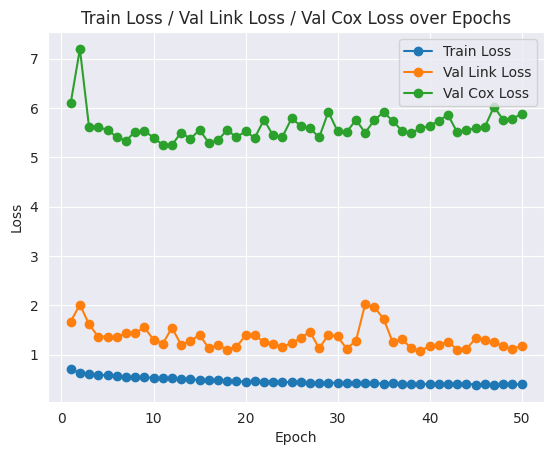

In [36]:
plt.figure()
plt.plot(df["epoch"], df["final_train_loss"], marker='o', linewidth=1.5)
plt.plot(df["epoch"], df["final_val_link_loss"], marker='o', linewidth=1.5)
plt.plot(df["epoch"], df["final_val_cox_loss"], marker='o', linewidth=1.5)
plt.title("Train Loss / Val Link Loss / Val Cox Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train Loss", "Val Link Loss", "Val Cox Loss"])
plt.grid(True)

# --- 2) Plot Link Prediction AUCs ---

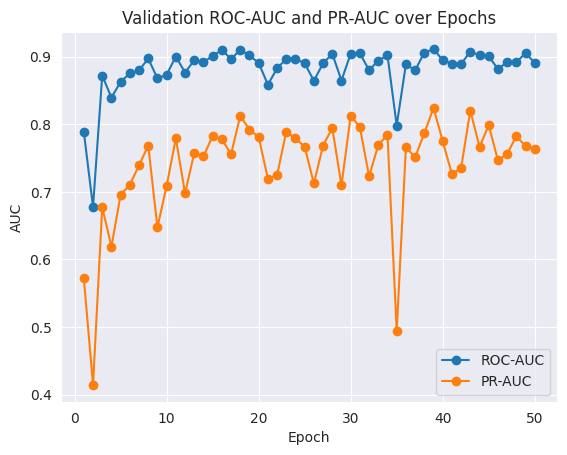

In [37]:
plt.figure()
plt.plot(df["epoch"], df["final_val_link_auc"],  marker='o', linewidth=1.5)
plt.plot(df["epoch"], df["final_val_pr_auc"],    marker='o', linewidth=1.5)
plt.title("Validation ROC-AUC and PR-AUC over Epochs")
plt.xlabel("Epoch")
plt.ylabel("AUC")
plt.legend(["ROC-AUC", "PR-AUC"])
plt.grid(True)

# --- 3) Plot Mean C-Index ---

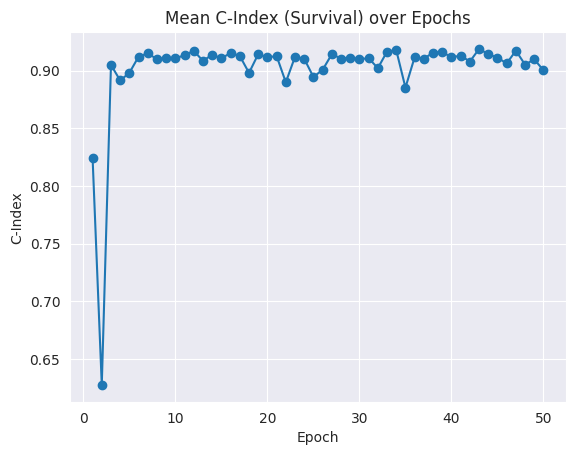

In [38]:
plt.figure()
plt.plot(df["epoch"], df["mean_c_index"], marker='o', linewidth=1.5)
plt.title("Mean C-Index (Survival) over Epochs")
plt.xlabel("Epoch")
plt.ylabel("C-Index")
plt.grid(True)

# --- 4) Per-Condition C-Index and PR-AUC Trends ---

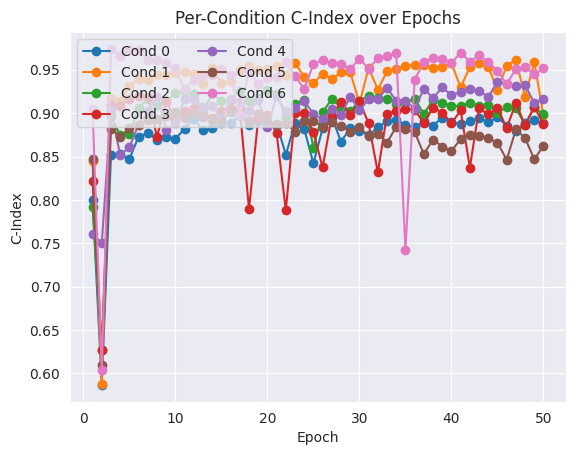

In [39]:
# Expand the list of per-condition c-indices into a DataFrame
sns.set(style="whitegrid", context="notebook", palette="tab10")

fig, ax = plt.subplots(figsize=(12, 6))

# plot each condition
for cond_idx in cidx_df.columns:
    ax.plot(
        cidx_df.index,
        cidx_df[cond_idx],
        label=f"Cond {cond_idx}",
        linewidth=2,
        marker='o',
        markersize=6,
        markevery=5,
        alpha=0.8
    )

# titles and labels
ax.set_title("Per-Condition C-Index over Epochs", fontsize=16, pad=12)
ax.set_xlabel("Epoch", fontsize=14)
ax.set_ylabel("C-Index", fontsize=14)

# fix y-range (adjust if your values lie in a narrower band)
ax.set_ylim(0.0, 1.02)

# subtle dashed grid
ax.grid(which='major', linestyle='--', linewidth=0.5, alpha=0.7)

# legend below the plot, no frame
ax.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, -0.15),
    ncol=4,
    frameon=False,
    fontsize=12
)

plt.tight_layout()
plt.show()

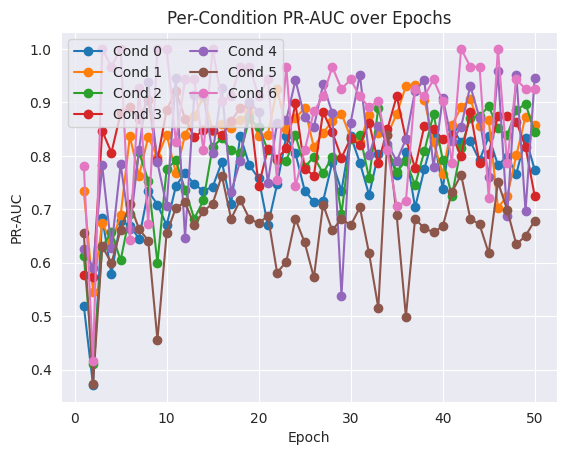

In [40]:
# Expand the list of per-condition link pr-auc into a DataFrame
sns.set(style="whitegrid", context="notebook", palette="tab10")

fig, ax = plt.subplots(figsize=(12, 6))

# plot each condition with a distinct color, marker every 5 points
for cond_idx in prauc_df.columns:
    ax.plot(
        prauc_df.index,
        prauc_df[cond_idx],
        label=f"Cond {cond_idx}",
        linewidth=2,
        marker='o',
        markersize=6,
        markevery=5,
        alpha=0.8
    )

# Labels, title, limits
ax.set_title("Per-Condition PR-AUC over Epochs", fontsize=16, pad=12)
ax.set_xlabel("Epoch", fontsize=14)
ax.set_ylabel("PR-AUC", fontsize=14)
ax.set_ylim(0.0, 1.02)

# Grid tweaks
ax.grid(which='major', linestyle='--', linewidth=0.5, alpha=0.7)

# Legend outside
ax.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, -0.15),
    ncol=4,
    frameon=False,
    fontsize=12
)

plt.tight_layout()
plt.show()

# --- 5) Display raw DataFrame for inspection ---

In [26]:
df.columns

Index(['final_train_loss', 'final_val_link_loss', 'final_val_link_auc',
       'final_val_pr_auc', 'final_val_cox_loss', 'c_indices_per_condition',
       'mean_c_index', 'epoch', 'NEGATIVE_MULTIPLIER', 'timestamp'],
      dtype='object')

In [27]:
df.head()

,final_train_loss,final_val_link_loss,final_val_link_auc,final_val_pr_auc,final_val_cox_loss,c_indices_per_condition,mean_c_index,epoch,NEGATIVE_MULTIPLIER,timestamp
0,0.699573,0.103719,0.814495,0.627509,0.361537,"[None, 0.7507867057216345, None, 0.94828000565...",0.852025,1,3,2025-05-04T14:54:06.940315
1,0.629121,0.099927,0.823914,0.622297,0.338229,"[None, 0.7753598820570415, None, 0.96320446437...",0.883405,2,3,2025-05-04T14:55:19.612514
2,0.608503,0.086052,0.847945,0.732109,0.332700,"[None, 0.7890356750809346, None, 0.97582532365...",0.896022,3,3,2025-05-04T14:56:30.129553
3,0.598460,0.116260,0.841324,0.704958,0.323362,"[None, 0.8044483485786968, None, 0.97871151333...",0.903925,4,3,2025-05-04T14:57:45.164251
4,0.587677,0.098291,0.849294,0.660343,0.350616,"[None, 0.798524701689281, None, 0.959688626184...",0.856929,5,3,2025-05-04T14:58:56.180737
